# **Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Preprocessing and Exploratory Data Analysis**

Importing necessary libraries for data preprocessing and visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#to ignore any warnings generated

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Basic Overview of the Dataset

In [ ]:
Heart_df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
Heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
Heart_df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


The above output provides us a clear representation of the structure of out dataset. The dataset consists of 11 feature columns and 1 target column.

In [ ]:
print(f"The dataset has {Heart_df.shape[0]} rows and {Heart_df.shape[1]} columns.")

The dataset has 918 rows and 12 columns.


In [ ]:
print(f"My Regression Target is\nHeartDisease\n")
Heart_df.iloc[2:10,11] #[row,column]

My Regression Target is
HeartDisease



,HeartDisease
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
dataset_cols = Heart_df.columns
print("Columns: ",dataset_cols)

Columns:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Checking missing values

In [ ]:
print("\nMissing Values:")
print(Heart_df.isnull().sum())


Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There were no null values present in the dataset. If present we would have dropped them using dropna to drop those values or fillna to fill those using mean/median imputations.

In [ ]:
print("\nDataset Info:")

print(Heart_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


The provided output gives us general idea about the data types that our dataset comprises of. We can observe that the target column is of int data type while the feature columns consists of float, int and object data types.

In [ ]:
duplicates = Heart_df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}\n")

Number of Duplicate Rows: 0



There were no duplicate values present in the dataset.If present we would drop them using drop_duplicates().

### Statistics

Separating categorical and numerical columns

In [ ]:
numerical_col=Heart_df.select_dtypes(exclude="object");
categorical_col=Heart_df.select_dtypes(include="object");

Summary statistics for Numerical Columns

In [ ]:
numerical_col.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The provided output helps us in understanding the central tendency,dispersion and data distributions of the features in our dataset.

* **Count**: Represents the non-null values for each attributes
* **Mean** :Represents the average values for each attributes
* **std**:Represents the spread of data around the mean
* **min**: represents the minimum values for each attributes.
* **25%**: Represents Q1,that indicates 25% of datas fall under this value.
* **50%**: Represents median,that indicates 50% of datas fall under this value.
* **75%**: Represents Q3,that indicates 75% of datas fall under this value.
* **max**: Represents the maximum values for each attributes.

Summary statistics for categorical columns


In [ ]:
print("The descriptive summary for the target column")
print(categorical_col.describe())

The descriptive summary for the target column
        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


* **Count**: Number of non-null values in the column (e.g., 918 entries).

* **Unique**: Number of distinct values in the column (e.g., 2 unique values for "Sex").
* **Top**: Most frequent value in the column (e.g., "M" appears most in "Sex").
* **Freq**: Frequency of the most common value (e.g., "M" appears 725 times).

EDA

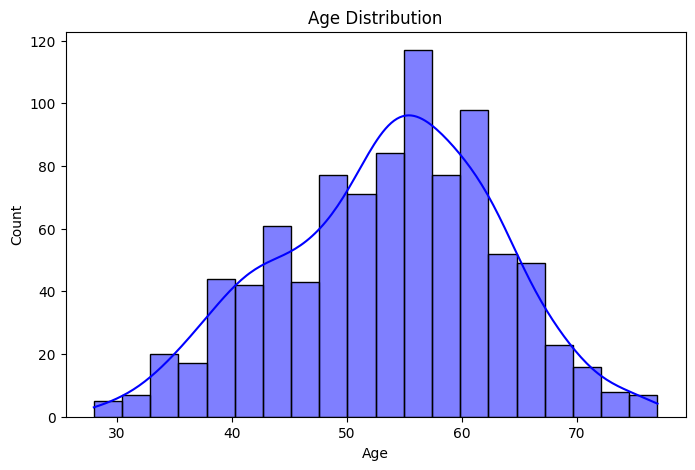

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(Heart_df["Age"], bins=20, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

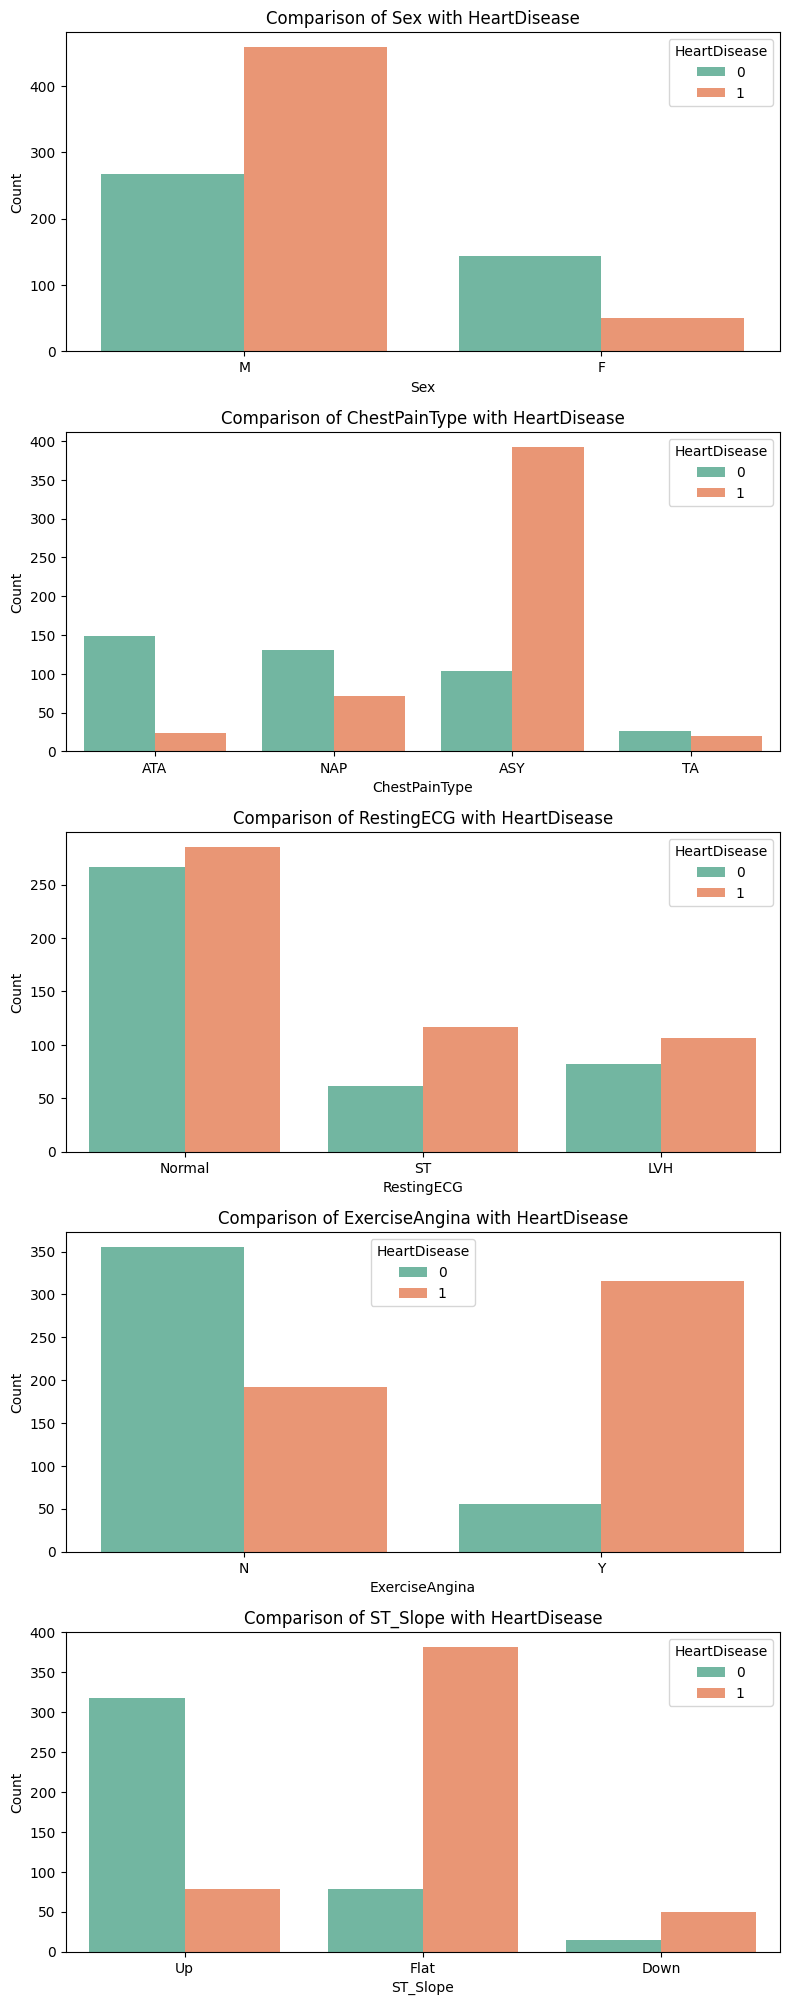

In [ ]:
def plot_categorical_features(data, features, target):
    plt.figure(figsize=(8, len(features) * 4))  # Adjusting figure height by multiplying one figure height to number of features
    for i, feature in enumerate(features, 1):
        plt.subplot(len(features), 1, i)
        sns.countplot(x=feature, hue=target, data=data, palette="Set2")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f"Comparison of {feature} with {target}")
    plt.tight_layout()
    plt.show()



# Call the function
plot_categorical_features(Heart_df, categorical_col, "HeartDisease")

Model Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
for col in categorical_col:
    Heart_df[col] = encoder.fit_transform(Heart_df[col].astype(str))
# fit(): Learns the unique categories in the column.
# transform(): Replaces each category with a unique integer.
print("Dataset after encoding:")
Heart_df.head()

#encodes into this
    # "Atypical Angina": 0,
    # "Non-Anginal Pain": 1,
    # "Typical Angina": 2,
    # "Asymptomatic": 3

Dataset after encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


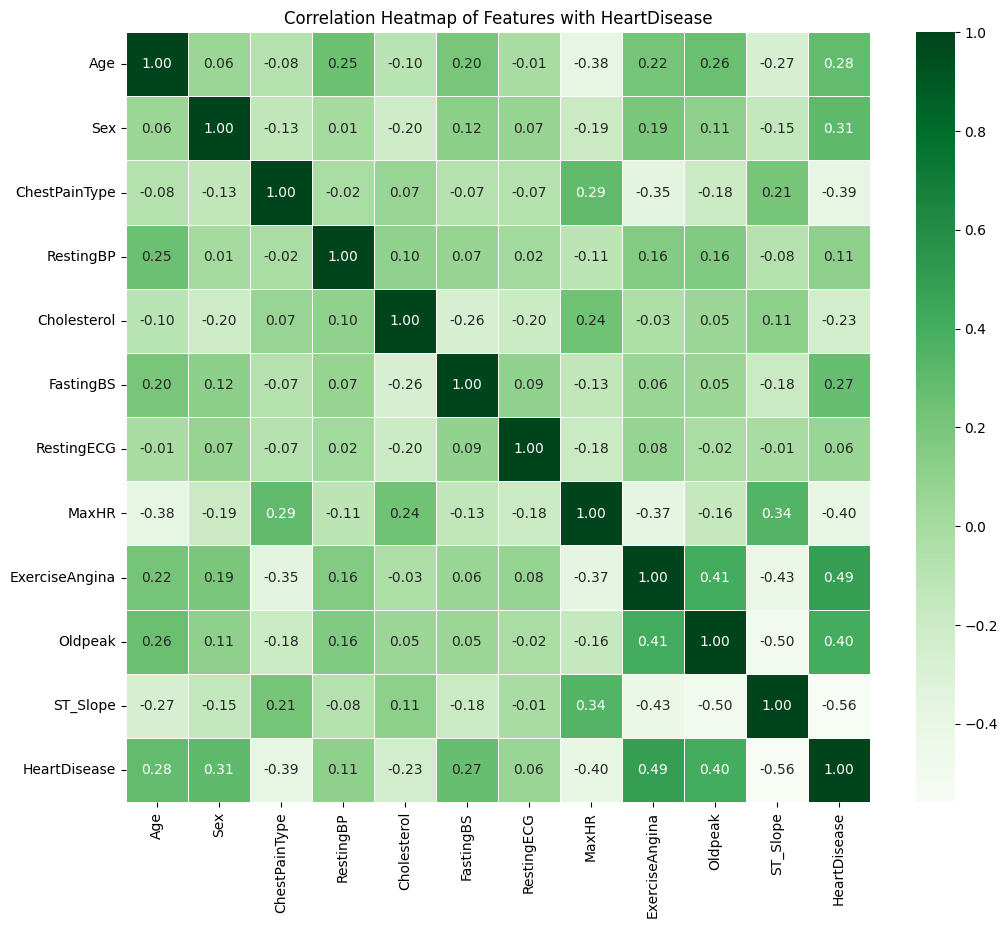

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(Heart_df.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features with HeartDisease")
plt.show()


Dataset Splitting

In [ ]:
X = Heart_df.drop(columns=['HeartDisease'])#features
y = Heart_df['HeartDisease']#target

Creating Training and Testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,y_train.shape

((734, 11), (734,))

In [ ]:
X_test.shape, y_test.shape

((184, 11), (184,))

Splitting the dataset into train and test is necessary to see how well the model will perform with unseen data. The sklearn's train_test_split uses holdout method to randomly split the dataset into  train and test set. In this case the train set is made up of 80% of dataset and remaining 20% is converted into test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Logistic Regression {Sigmoid} from scratch**

In [ ]:
#used to predict the probability of a binary outcome in logistic regression
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1 / (1 + np.exp(-x))
  return y

In [ ]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [ ]:
# evaluates how well the model is performing by calculating the avg error across all predictions
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)  # Get the number of data points
    loss_vec = [log_loss(y_true[i], y_pred[i]) for i in range(n)] # Calculate log loss for each data point
    cost = sum(loss_vec) / n  # Calculate average log loss (cost)
    return cost

In [ ]:
# evaluates how well the logistic regression model is fitting the data
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b  # Matrix-vector multiplication and adding bias

    # Compute predictions using logistic function (sigmoid)
    y_pred = 1 / (1 + np.exp(-z)) # This line was missing

    # Compute the cost using the cost function
    cost = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m

    return cost


In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n  # Gradient w.r.t weights, shape (d,)
    grad_b = np.sum(y_pred - y) / n          # Gradient w.r.t bias, scalar

    return grad_w, grad_b   # these gradients are used to update the model parameters during optimization

In [ ]:
# iteratively adjusts the models parameters to minimize the cost function, improving the model's performance
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_w, grad_b = compute_gradient(X, y, w, b) # Calling the compute_gradient function to get gradients

        # Update weights and bias
        w -= alpha * grad_w  # Updating weights using gradients and learning rate
        b -= alpha * grad_b  # Updating bias using gradients and learning rate

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history #cost hist -used to track model performance,paramshist-which stores the weights and bias at each iteration


In [ ]:

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob = logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [ ]:
# Initialize parameters
n_features = X_train.shape[1]# Gets the number of features (columns) in the training data X_train
w_initial = np.zeros(n_features)#Initializes the weights w to zero(starting point for optimization)
b_initial = 0.0#Initializes the bias b to zero also start point
alpha = 0.01#(learning rate) controls how much the weights are updated during gradient descent.
n_iter = 1000#number of iterations (epochs) for the gradient descent algorithm, meaning the model will update the weights and bias 1000 times

# Train model
w_final, b_final, cost_history, params_history = gradient_descent(X_train_scaled, y_train, w_initial, b_initial, alpha, n_iter, show_cost=True, show_params=False)

# Predict and evaluate
y_pred_train = prediction(X_train_scaled, w_final, b_final)
y_pred_test = prediction(X_test_scaled, w_final, b_final)

print("\n Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.3f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Iteration 0: Cost = 0.689598
Iteration 100: Cost = 0.494981
Iteration 200: Cost = 0.431401
Iteration 300: Cost = 0.403107
Iteration 400: Cost = 0.387860
Iteration 500: Cost = 0.378595
Iteration 600: Cost = 0.372488
Iteration 700: Cost = 0.368226
Iteration 800: Cost = 0.365124
Iteration 900: Cost = 0.362793
Iteration 999: Cost = 0.361014

 Model Evaluation on Test Set:
Accuracy: 0.842

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Confusion Matrix:
 [[68  9]
 [20 87]]


Choosing right models                      


### Initial Models

####**RandomForestClassifier**

RFC works by training multiple decision trees using random subsets of the training data and features. It combines the prediction of these decision trees to make the final classification detection. RFC is robust to outliers and class imbalances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42,max_depth=3)
rf_model.fit(X_train_scaled, y_train) #model inputs

RandomForestClassifier(max_depth=3, random_state=42)

In [ ]:
yTrain_pred_rf = rf_model.predict(X_train_scaled)
yTest_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
accuracy_train_rf = accuracy_score(y_train, yTrain_pred_rf)
print(f"Random Forest Accuracy on training set : {accuracy_train_rf*100:.3f}%")

accuracy_test_rf = accuracy_score(y_test, yTest_pred_rf)
print(f"Random Forest Accuracy on test set : {accuracy_test_rf*100:.3f}%")

Random Forest Accuracy on training set : 87.330%
Random Forest Accuracy on test set : 86.413%


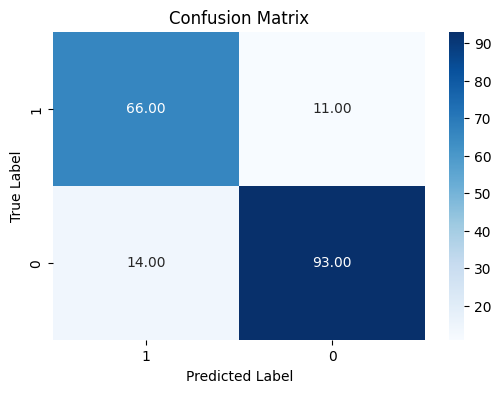

In [ ]:
confusion_matrix_rf=confusion_matrix(y_test,yTest_pred_rf)
labels = [1,0]
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_rf_train=classification_report(y_train,yTrain_pred_rf)
print("The initial classification report using Random Forest on training set:\n")
print(class_report_rf_train)

The initial classification report using Random Forest on training set:

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       333
           1       0.86      0.92      0.89       401

    accuracy                           0.87       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.87      0.87      0.87       734



In [ ]:
class_report_rf=classification_report(y_test,yTest_pred_rf)
print("The initial classification report using Random Forest on testing set:\n")
print(class_report_rf)

The initial classification report using Random Forest on testing set:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



Observations

Random Forest Classifier performed very well on the dataset, achieving 87% on training test and 86% on test set with similar precsion, recall, and F1-score values. The accuracy indicates there is no overfitting.

Here,
* **precision**:ratio of true positive prediction to all positive prediction
* **recall**:ratio of correct prediction (true positives)to all prediction of the actual positive class
* **f1-score**:the weighted average of Precision and Recall.

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_train_gb = gb_model.predict(X_train_scaled)
y_pred_test_gb = gb_model.predict(X_test_scaled)

In [ ]:
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
print(f"Gradient Boosting Accuracy on training set : {accuracy_train_gb*100:.3f}%")
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)
print(f"Gradient Boosting Accuracy on test set: {accuracy_test_gb*100:.3f}%")

Gradient Boosting Accuracy on training set : 94.142%
Gradient Boosting Accuracy on test set: 87.500%


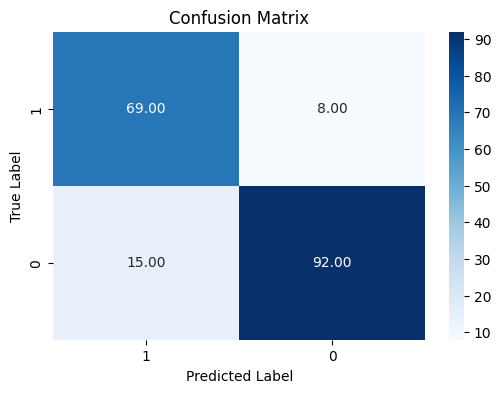

In [ ]:
confusion_matrix_rf=confusion_matrix(y_test,y_pred_test_gb)
labels = [1,0]
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_rf, annot=True, cmap='Blues', fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report_gb_train=classification_report(y_train,y_pred_train_gb)

print("The initial classification report using Gradient Boosting on training set:\n")
print(class_report_gb_train)

The initial classification report using Gradient Boosting on training set:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       333
           1       0.94      0.95      0.95       401

    accuracy                           0.94       734
   macro avg       0.94      0.94      0.94       734
weighted avg       0.94      0.94      0.94       734



In [ ]:
class_report_gb=classification_report(y_test,y_pred_test_gb)

print("The initial classification report using Gradient Boosting on test set:\n")
print(class_report_gb)

The initial classification report using Gradient Boosting on test set:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        77
           1       0.92      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



## **HyperParameter Tuning**

Hyperparameter tuning is essential to optimize the model's performance by finding the most suitable settings for parameters

Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200], #Number of trees in the random forest
    'max_depth': [3, 5, 10], #Maximum depth of each tree.
    'min_samples_split': [2, 5, 10] #Minimum number of samples needed to split a node.
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)




GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_param=grid_rf.best_params_
print("Best Random Forest Parameters:",best_param)

Best Random Forest Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


Feature Selection

Feature selection helps the model focus on the most important features, improving efficiency

In [ ]:
from sklearn.feature_selection import SelectFromModel
final_rf_model = SelectFromModel(rf_model, prefit=True)
X_new = final_rf_model.transform(X)


In [ ]:
print("Original shape:", X.shape)
print("Reduced shape:", X_new.shape)

Original shape: (918, 11)
Reduced shape: (918, 4)


In [ ]:
# Get the selected feature names
selected_features_rfc = X_train.columns[final_rf_model.get_support()]
print("Selected Features for Random Forest Classifier:", list(selected_features_rfc))

Selected Features for Random Forest Classifier: ['ChestPainType', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


###Tuning

In [ ]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
gb_best_param = grid_gb.best_params_
print("Best Gradient Boosting Parameters:",gb_best_param)

Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


Feature Selection for Gradient Boosting

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Fit the model using the training data
feature_selector_gb = SelectFromModel(gb_model, threshold='median')
feature_selector_gb.fit(X_train, y_train)


SelectFromModel(estimator=GradientBoostingClassifier(random_state=42),
                threshold='median')

In [ ]:
# Get the selected feature names
selected_features_gb = X_train.columns[feature_selector_gb.get_support()]##Finds which features were selected. Extracts the names of selected features.
print("Selected Features for Gradient Boosting:", list(selected_features_gb))

Selected Features for Gradient Boosting: ['ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [ ]:
# Transform the dataset
X_train_selected_gb = feature_selector_gb.transform(X_train)
X_test_selected_gb = feature_selector_gb.transform(X_test)

In [ ]:
# Train the optimized Gradient Boosting model with selected features
best_gb_model = GradientBoostingClassifier(**gb_best_param, random_state=42)
best_gb_model.fit(X_train_selected_gb, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42)

In [ ]:
# Make predictions
y_pred_gb_selected_train = best_gb_model.predict(X_train_selected_gb)
y_pred_gb_selected = best_gb_model.predict(X_test_selected_gb)



In [ ]:
accuracy_gb_selected_train = accuracy_score(y_train, y_pred_gb_selected_train)
print(f"Gradient Boosting Accuracy after Feature Selection on training set: {accuracy_gb_selected_train:.2f}")

print("The final classification report using Gradient Boosting on training set:\n")
print(classification_report(y_train, y_pred_gb_selected_train))

Gradient Boosting Accuracy after Feature Selection on training set: 0.88
The final classification report using Gradient Boosting on training set:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       333
           1       0.86      0.93      0.89       401

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734



In [ ]:
accuracy_gb_selected = accuracy_score(y_test, y_pred_gb_selected)
print(f"Gradient Boosting Accuracy after Feature Selection on test set: {accuracy_gb_selected:.2f}")
# Detailed classification report
print("Classification Report after Feature Selection on test set:")
print(classification_report(y_test, y_pred_gb_selected))

Gradient Boosting Accuracy after Feature Selection on test set: 0.88
Classification Report after Feature Selection on test set:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



The training accuracy dropped from 94% to 88%, but the test accuracy remained stable at 88%. This indicates that overfitting was reduced because the model no longer memorizes the training data but generalizes better

**Conclusion:** Overall in the initial model both did good in their own ways rfc had less overfit but gb had more accuracy. So i build both final models and choosed which had done better which is gb. The model improved after tuning & feature selection!
Overfitting is significantly reduced.
The model generalizes better to new data without sacrificing test performance.
Test accuracy remains stable (88%), meaning the feature selection and tuning did not hurt generalization.
Precision, Recall, and F1-score are balanced, meaning both classes are being classified well.